In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
basePath = '../sims.TNG/TNG100-1/output/'

3a. Plot the 2D distribution of all satellites in the most massive halo.

In [3]:
fields = ['Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200']

In [4]:
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [5]:
halos['Group_M_Crit200'].shape, halos['Group_M_Crit500'].shape, halos['Group_M_Mean200'].shape, halos['Group_M_TopHat200'].shape 

((6291349,), (6291349,), (6291349,), (6291349,))

In [6]:
np.argmax(halos['Group_M_Crit200']), np.argmax(halos['Group_M_Crit500']),np.argmax(halos['Group_M_Mean200']),np.argmax(halos['Group_M_TopHat200'])

(1, 0, 1, 1)

In [7]:
halos['Group_M_Crit200'][:5], halos['Group_M_Crit500'][:5], halos['Group_M_Mean200'][:5], halos['Group_M_TopHat200'][:5]

(array([25525.373, 25818.896, 22864.832, 11583.856, 17189.889],
       dtype=float32),
 array([15808.771, 13689.105, 15700.115,  8534.966, 10452.973],
       dtype=float32),
 array([35478.406, 36520.535, 29763.365, 19132.256, 21951.023],
       dtype=float32),
 array([31229.082 , 34280.508 , 27240.99  , 14446.3545, 20628.959 ],
       dtype=float32))

Taking the index 1 as the most massive halo

In [8]:
most_massiv_subhalo = il.groupcat.loadSingle(basePath, 99, haloID=1)

In [9]:
most_massiv_subhalo.keys()

dict_keys(['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])

In [10]:
len(most_massiv_subhalo)

25

In [11]:
x_cm, y_cm, z_cm = most_massiv_subhalo['GroupCM']

In [12]:
x_cm, y_cm, z_cm

(19824.506, 47875.07, 48904.42)

In [13]:
GroupFirstSub = most_massiv_subhalo['GroupFirstSub']

In [14]:
GroupNsubs = most_massiv_subhalo['GroupNsubs']

In [15]:
x = []
y = []

In [16]:
for i in range(GroupFirstSub+1, GroupFirstSub+GroupNsubs):
    sub = il.groupcat.loadSingle(basePath, 99, subhaloID=i)
    x.append(sub['SubhaloPos'][0])
    y.append(sub['SubhaloPos'][1])

In [17]:
len(x), len(y)

(14156, 14156)

In [18]:
np.max(x), np.max(y), np.min(x), np.min(y)

(21379.934, 49387.34, 18164.812, 46293.14)

In [19]:
np.min(x), np.min(y)

(18164.812, 46293.14)

In [20]:
mpl.rcParams['agg.path.chunksize'] = 10000 # Required while plotting a large number of points 
mpl.rcParams['path.simplify_threshold'] = 1.0

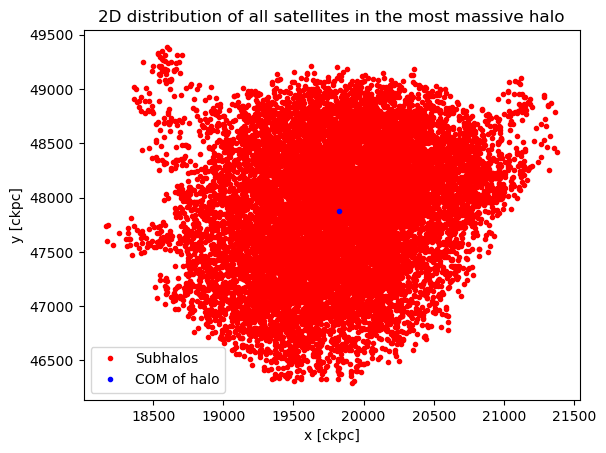

In [21]:
fig, ax = plt.subplots()

ax.plot(x, y, 'r.', label='Subhalos')
ax.plot(x_cm, y_cm, 'b.', label='COM of halo')

ax.set_xlabel('x [ckpc]')
ax.set_ylabel('y [ckpc]')
ax.set_title('2D distribution of all satellites in the most massive halo')
ax.legend()
plt.show()

In [22]:
luminous_dist = []
dark_dist = []

3b. Plot the radial distribution of all subhalos in the most massive halo.

In [23]:
# for i in range(GroupFirstSub, GroupFirstSub+GroupNsubs):
#     sub = il.groupcat.loadSingle(basePath, 99, subhaloID=i)
#     if sub['SubhaloLenType'][4] >= 1:
#         luminous_x.append(sub['SubhaloPos'][0])
#         luminous_y.append(sub['SubhaloPos'][1])
#     else:
#         dark_x.append(sub['SubhaloPos'][0])
#         dark_y.append(sub['SubhaloPos'][1])

In [24]:
for i in range(GroupFirstSub, GroupFirstSub+GroupNsubs):
    sub = il.groupcat.loadSingle(basePath, 99, subhaloID=i)
    if sub['SubhaloLenType'][4] >= 1:
        x = (sub['SubhaloPos'][0])
        y = (sub['SubhaloPos'][1])
        luminous_dist.append(math.sqrt(((x - x_cm) ** 2) + ((y - y_cm) ** 2)))
    else:
        x = (sub['SubhaloPos'][0])
        y = (sub['SubhaloPos'][1])
        dark_dist.append(math.sqrt(((x - x_cm) ** 2) + ((y - y_cm) ** 2)))

In [26]:
len(luminous_dist), len(dark_dist)

(2931, 11226)

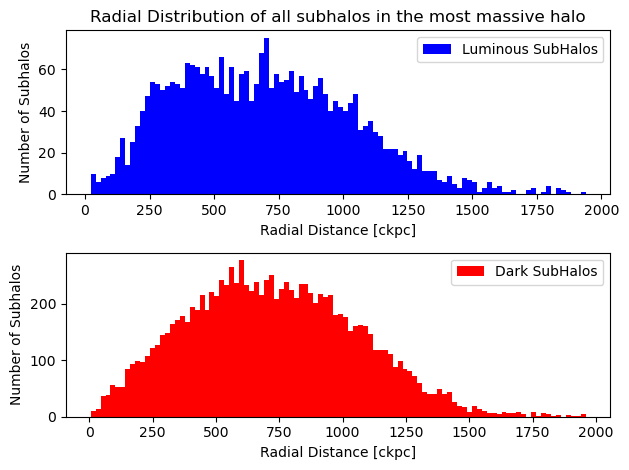

In [25]:
plt.figure()

ax1 = plt.subplot(211)
ax1.hist(luminous_dist, bins=100, color='blue', label='Luminous SubHalos')
ax1.set_xlabel('Radial Distance [ckpc]')
ax1.set_ylabel('Number of Subhalos')
ax1.legend()

plt.title('Radial Distribution of all subhalos in the most massive halo')

ax2 = plt.subplot(212)
ax2.hist(dark_dist, bins=100, color='red', label='Dark SubHalos')
ax2.set_xlabel('Radial Distance [ckpc]')
ax2.set_ylabel('Number of Subhalos')
ax2.legend()

plt.tight_layout()
plt.show()